Нуралиев Расим. Группа ПИ19-4

## Task 2

Функция спроса q1:


28 - p1

Функция спроса q2:


20 - p2

Функция издержек С:


4*q1**2 + 2*q1*q2 + q2**2 + 5

Функция для минимизации


-5.0*q1**2 - 2*q1*q2 + 28.0*q1 - 2.0*q2**2 + 20.0*q2 - 5

Optimization terminated successfully.
         Current function value: -63.000000
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Найденные параметры для q1 и q2: [2.00000088 3.99999934]
Максимальное значение функции: 62.99999999999645


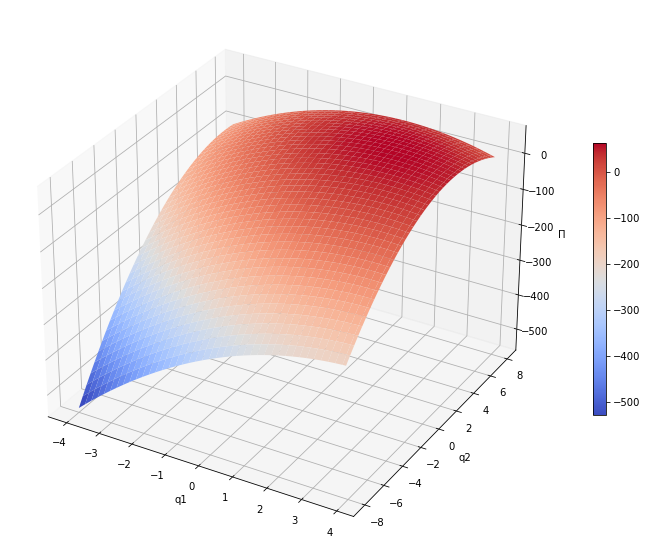

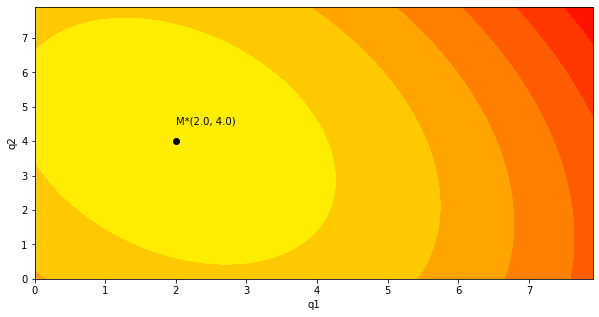

In [19]:
import numpy as np
from scipy.optimize import minimize 
import sympy as sym

from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm


# Функция для минимизации
def P(x):
    global params
    a, b, c, d, k, l, m, n = list(map(int, params))

    q1 = x[0]
    q2 = x[1]
    return -((1/b - k)*q1*q1 + (1/d - m)*q2*q2-a/b*q1 - c/d*q2 - l*q1*q2 - n)


# Функция издержек С
def C(x, k, l, m, n):
    q1 = x[0]
    q2 = x[1]
    return k*q1*q1 + l*q1*q2 + m*q2*q2 + n


# Функция градиента
def gr(x):
    global params
    a, b, c, d, k, l, m, n = list(map(int, params))


    der = np.zeros_like(x)
    q1 = x[0]
    q2 = x[1]
    der[0] = -(2*(1/b-k)*q1-l*q2-a/b)
    der[1] = -(2*(1/d-m)*q2-l*q1-c/d)
    return der


def find_partial_derivative(a, b, c, d, k, l, m):
    res = [0, 0]

    res[0] = (sym.parsing.sympy_parser.parse_expr(f'{2*(1/b-k)}*q1-({l}*q2)-({a/b})'))
    res[1] = (sym.parsing.sympy_parser.parse_expr(f'{2*(1/d-m)}*q2-({l}*q1)-({c/d})'))
    return res


def Deriv2Dn(f, x=0, y=0):
    M = {'x':x,'y':y}
    x_s, y_s = sym.symbols('x y')
    value = eval(f)
    f = sym.parsing.sympy_parser.parse_expr(f)
    grad = {'x':0,'y':0}
    grad['x'] = eval(str(f.diff(x_s)))
    grad['y'] = eval(str(f.diff(y_s)))
    hess = {'x': {'x': eval(str(f.diff(x_s).diff(x_s))), 'y': eval(str(f.diff(x_s).diff(y_s)))},
            'y': {'x': eval(str(f.diff(y_s).diff(x_s))), 'y': eval(str(f.diff(y_s).diff(y_s)))}}
    Delta1 = hess['x']['x']
    Delta2 = hess['x']['x']*hess['y']['y']-hess['x']['y']**2
    return {'Function': f, 'Point': M, 'Value_Func:': value, 'Gradient': grad, 'Hessian': hess, 'Delta1': Delta1, 'Delta2': Delta2}


def draw_gradient():
    # Настраиваем 3D график
    fig, ax = plt.subplots(figsize=(15,10), subplot_kw={"projection": "3d"})

    # Задаем угол обзора
    # ax.view_init(15, 10)

    # Создаем данные для графика
    X = np.arange(-4, 4, 0.1)
    Y = np.arange(-8, 8, 0.1)
    X, Y = np.meshgrid(X, Y)
    Z = -P(np.array([X,Y]))

    # Рисуем поверхность
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
    fig.colorbar(surf, shrink=0.5)
    ax.set_xlabel('q1')
    ax.set_ylabel('q2')
    ax.set_zlabel('П')

    #   plt.savefig(f'{__file__}_gr.png')
    plt.show()


# Функция для произведения расчетов 
def solve_task(params):
    a, b, c, d, k, l, m, n = list(map(int, params))

    print(f'Функция спроса q1:')
    display(sym.parsing.sympy_parser.parse_expr(f'{a} + ({b} * p1)'))

    print(f'Функция спроса q2:')
    display(sym.parsing.sympy_parser.parse_expr(f'{c} + ({d} * p2)'))

    print(f'Функция издержек С:')
    display(sym.parsing.sympy_parser.parse_expr(f'{k}*q1**2 + {l}*q1*q2 + {m}*q2**2 + {n}'))


    f = f"{1/b - k}*q1**2 + ({1/d - m}*q2**2) - ({a/b}*q1) - ({c/d}*q2) - ({l}*q1*q2) - ({n})"
    print("Функция для минимизации")
    display(sym.parsing.sympy_parser.parse_expr(f))

    find_partial_derivative(a, b, c, d, k, l, m)


    x0 = np.array([0.5, 0.5])
    res = minimize(P, x0, method='BFGS', jac=gr, options={'disp': True})

    print('Найденные параметры для q1 и q2:', res.x)
    print('Максимальное значение функции:',-res.fun)

    # Вычисление градиента и гессиана исследуемой функции в точке экстремума
    Deriv2Dn(f'{1/b - k}*x**2 + ({1/d - m}*y**2) - ({a/b}*x) - ({c/d}*y) - ({l}*x*y) - ({n})',x=res.x[0],y=res.x[1])
    draw_gradient()

    fig, ax = plt.subplots(figsize=(10,5))

    u = res.x[0]
    v = res.x[1]
    X = np.arange(0, 8, 0.1)
    Y = np.arange(0, 8, 0.1)
    X, Y = np.meshgrid(X, Y)
    Z = -P(np.array([X,Y]))

    ax.contourf(X, Y, Z, cmap='autumn')
    ax.plot(u, v, 'ko')
    ax.text(u, v+0.5, f'M*({u.round(3)}, {v.round(3)})')
    ax.set_xlabel('q1')
    ax.set_ylabel('q2')
    plt.show()


def main(): 
  global params

  params = [28, -1, 20, -1, 4, 2, 1, 5]
  func = ''  
  solve_task(params)


if __name__ == '__main__':
  main()

  